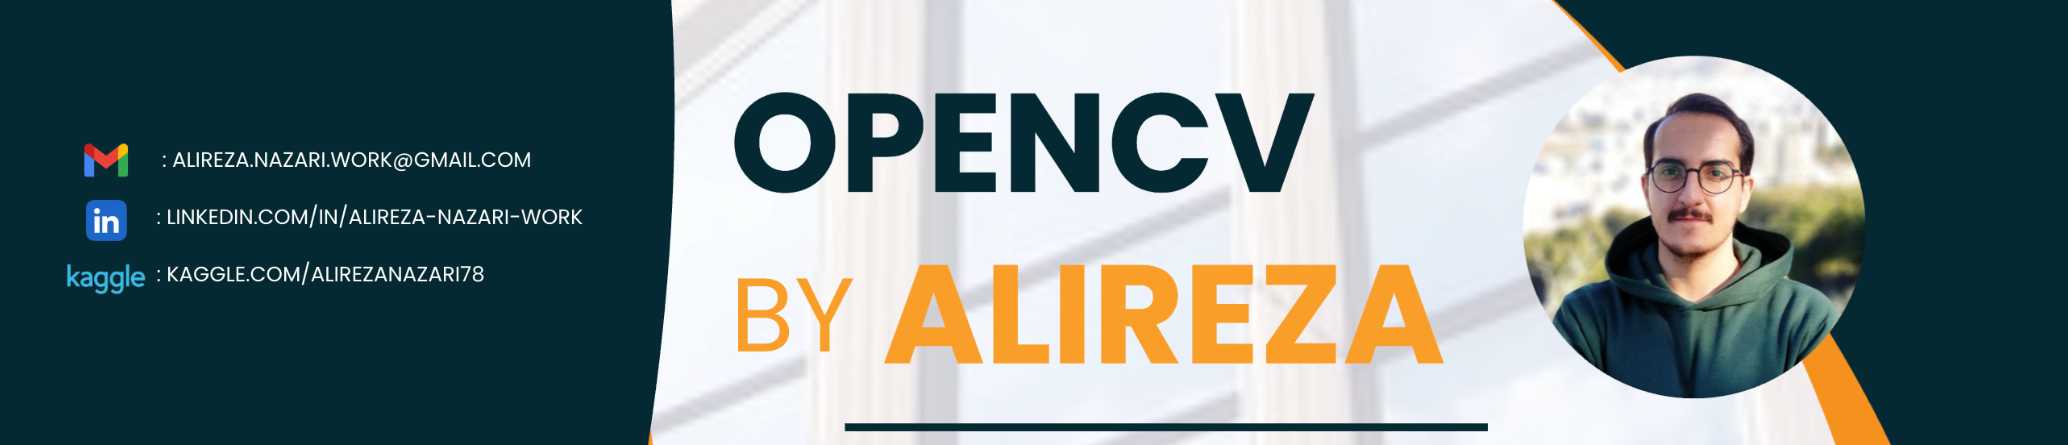

## 40 - Circle detection

Below are the steps of the algorithm.
Initializing the Accumulator Matrix: Initialize a matrix of dimensions rows * cols * maxRadius with zeros.

Pre-processing the image: Apply blurring, grayscale and an edge detector on the image. This is done to ensure the circles show as darkened image edges.

Looping through the points: Pick a point Xi on the image.

Fixing r and looping through a and b: Use a double nested loop to find a value of r, varying a and b in the given ranges.

Voting: Pick the points in the accumulator matrix with the maximum value. These are strong points which indicate the existence of a circle with a, b and r parameters. This gives us the Hough space of circles.

Finding Circles: Finally, using the above circles as candidate circles, vote according to the image. The maximum voted circle in the accumulator matrix gives us the circle.

``for a in range(rows):``

    for b in range(cols):

        r = math.sqrt((xi - a)**2 + (yi - b)**2)

        accum_matrix[a][b][r] += 1 

Detection Method: OpenCV has an advanced implementation, HOUGH_GRADIENT, which uses gradient of the edges instead of filling up the entire 3D accumulator matrix, thereby speeding up the process.

dp: This is the ratio of the resolution of original image to the accumulator matrix.

minDist: This parameter controls the minimum distance between detected circles.

Param1: Canny edge detection requires two parameters -- minVal and maxVal. Param1 is the higher threshold of the two. The second one is set as Param1/2.

Param2: This is the accumulator threshold for the candidate detected circles. By increasing this threshold value, we can ensure that only the best circles, corresponding to larger accumulator values, are returned.

minRadius: Minimum circle radius.

maxRadius: Maximum circle radius.

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

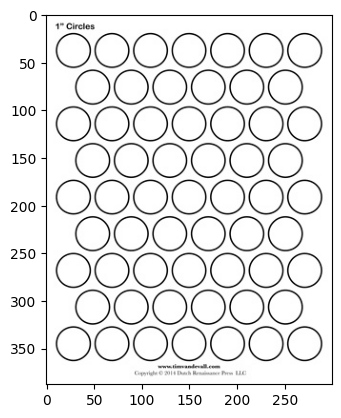

In [14]:
image = cv2.imread("/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/Circles.jpg",0)
plt.imshow(image , cmap="gray")

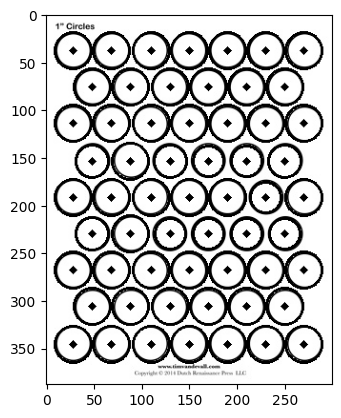

In [ ]:

blurred = cv2.blur(image, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,param2 = 30, minRadius = 1, maxRadius = 40)

if detected_circles is not None:

    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(image, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(image, (a, b), 2, (0, 0, 255), 3)

plt.imshow(image , cmap='gray')


### Source :

https://www.geeksforgeeks.org/python/opencv-python-tutorial/